<a href="https://colab.research.google.com/github/tommasomncttn/NLP-Disaster-Tweet-Detection/blob/main/dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ML_proj/train.csv")

In [ ]:
print(df.head())
print(df.columns)

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


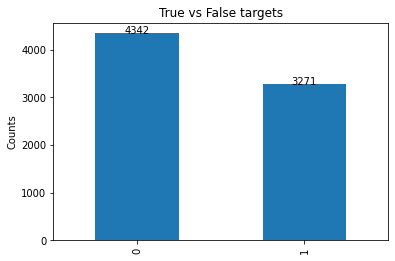

In [ ]:
#count how many positives and negatives lables in the dataset
target_counts = df['target'].value_counts()

# bar plot 
bar_plt = target_counts.plot(kind='bar')

bar_plt.set_title("True vs False targets")
bar_plt.set_ylabel("Counts")

for i, v in enumerate(target_counts):
    bar_plt.text(i, v+1, str(v), ha='center')

plt.show()

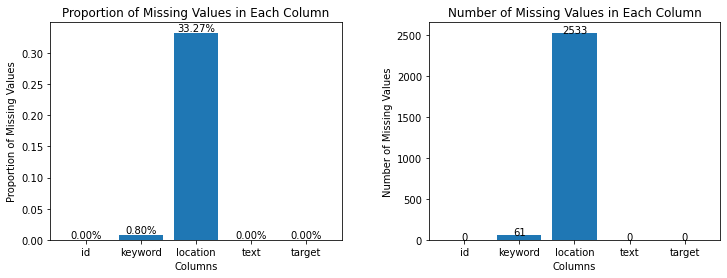

In [ ]:
prop_missing = df.isna().mean()
sum_missing = df.isna().sum()

# one row and two columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#barchart of PROPORTION of missing values
axs[0].bar(prop_missing.index, prop_missing)
axs[0].set_title('Proportion of Missing Values in Each Column')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Proportion of Missing Values')
for i, v in enumerate(prop_missing):
    axs[0].annotate(f"{v:.2%}", xy=(i, v), ha='center', va='bottom')

#barchart of NUMBER of missing values
axs[1].bar(sum_missing.index, sum_missing)
axs[1].set_title('Number of Missing Values in Each Column')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Number of Missing Values')
for i, v in enumerate(sum_missing):
    axs[1].annotate(v, xy=(i, v), ha='center')

# display the plot
fig.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
#looking for the conditional probability of having a positive lablel given the missing location or keyword

prob_target_given_keyword = df.loc[df['keyword'].isnull(), 'target'].mean()
print(f"Conditional probability of having a 1 in 'target' column given a null value in 'keyword' column: {prob_target_given_keyword:.2f}")

prob_target_given_keyword = df.loc[df['keyword'].notnull(), 'target'].mean()
print(f"Conditional probability of having a 1 in 'target' column given a  value in 'keyword' column: {prob_target_given_keyword:.2f}")

print("")

prob_target_given_location = df.loc[df['location'].isnull(), 'target'].mean()
print(f"Conditional probability of having a 1 in 'target' column given a null value in 'location' column: {prob_target_given_location:.2f}")

prob_target_given_location = df.loc[df['location'].notnull(), 'target'].mean()
print(f"Conditional probability of having a 1 in 'target' column given a value in 'location' column: {prob_target_given_location:.2f}")


Conditional probability of having a 1 in 'target' column given a null value in 'keyword' column: 0.69
Conditional probability of having a 1 in 'target' column given a  value in 'keyword' column: 0.43

Conditional probability of having a 1 in 'target' column given a null value in 'location' column: 0.42
Conditional probability of having a 1 in 'target' column given a value in 'location' column: 0.43
